In [38]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from matplotlib import offsetbox
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from time import time
import seaborn as sns
from matplotlib import offsetbox
import pickle

In [2]:
%matplotlib inline
plt.style.use('bmh')

X = np.load('ships_dataset/ship_data.npy')
t = np.load('ships_dataset/ship_labels.npy')

label_names = ['no_ship', 'ship']

X.shape, t.shape

((4000, 80, 80, 3), (4000,))

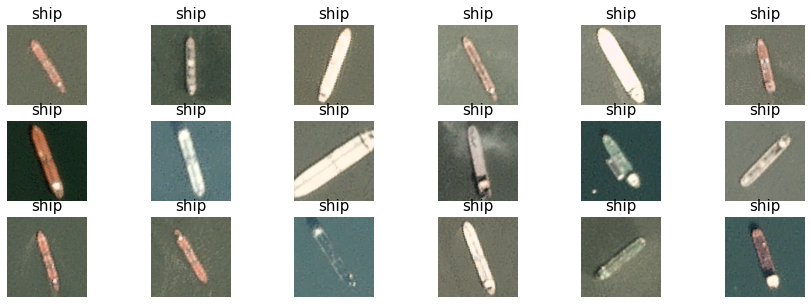

In [57]:
# ship images

rnd_sample = npr.permutation(np.where(t==1)[0])
fig=plt.figure(figsize=(15,5))
for j in range(18):
    fig.add_subplot(3,6,j+1)
    plt.imshow(X[rnd_sample[j]])
    plt.axis('off');plt.title(label_names[t[rnd_sample[j]]],size=15)
plt.show()
print('\n\n')

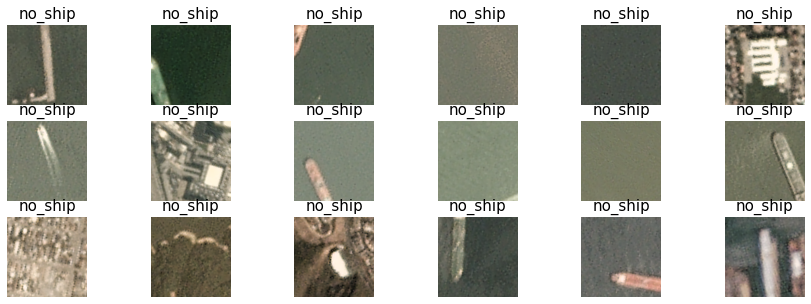

In [58]:
# no_ship images

rnd_sample = npr.permutation(np.where(t==0)[0])
fig=plt.figure(figsize=(15,5))
for j in range(18):
    fig.add_subplot(3,6,j+1)
    plt.imshow(X[rnd_sample[j]])
    plt.axis('off');plt.title(label_names[t[rnd_sample[j]]],size=15)
plt.show()
print('\n\n')

In [61]:
'''import os
from PIL import Image
bay_name = ['San Pedro Bay']*4 + ['San Francisco Bay']*4

directory = 'ships_dataset/scenes/'
plt.figure(figsize=(15,5))
j=1
for file in os.listdir(directory):
    if file.endswith('.png'):
        filename = directory+'/'+file
        # Loads image
        image = np.array(Image.open(filename).convert('RGB'))
        plt.subplot(2,4,j); plt.imshow(image); plt.axis('off');plt.title(bay_name[j-1])
        j+=1'''

"import os\nfrom PIL import Image\nbay_name = ['San Pedro Bay']*4 + ['San Francisco Bay']*4\n\ndirectory = 'ships_dataset/scenes/'\nplt.figure(figsize=(15,5))\nj=1\nfor file in os.listdir(directory):\n    if file.endswith('.png'):\n        filename = directory+'/'+file\n        # Loads image\n        image = np.array(Image.open(filename).convert('RGB'))\n        plt.subplot(2,4,j); plt.imshow(image); plt.axis('off');plt.title(bay_name[j-1])\n        j+=1"

 1. Training 2 classifiers (no dimension reduction) w/ hyperparameter tuning
Logistic regresion and SVM


### First classifier will be a Random Forest and we will use Grid Search to perform hyperparameter tuning.

In [3]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 0, stratify = t)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [90]:
pipe1 = Pipeline([('scaler', StandardScaler()),
                 ('forest', RandomForestClassifier())])

param_grid1 = {'forest__n_estimators': [50, 100], 'forest__max_depth': [100, 1000]}
grid_search1 = GridSearchCV(pipe1, param_grid1, scoring='accuracy', verbose = 3, cv = 3)

grid_search1.fit(X_train_reshaped, t_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50;, score=0.939 total time=   7.2s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50;, score=0.966 total time=   7.0s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50;, score=0.937 total time=   7.1s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=100;, score=0.946 total time=  13.4s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=100;, score=0.965 total time=  13.6s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=100;, score=0.946 total time=  14.3s
[CV 1/3] END forest__max_depth=1000, forest__n_estimators=50;, score=0.937 total time=   7.2s
[CV 2/3] END forest__max_depth=1000, forest__n_estimators=50;, score=0.969 total time=   7.0s
[CV 3/3] END forest__max_depth=1000, forest__n_estimators=50;, score=0.939 total time=   7.0s
[CV 1/3] END forest__max_depth=1000, forest__n_estimators=100;, score=0.939 total time=  13.7s
[C

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'forest__max_depth': [100, 1000],
                         'forest__n_estimators': [50, 100]},
             scoring='accuracy', verbose=3)

In [91]:
grid_search1.best_params_

{'forest__max_depth': 100, 'forest__n_estimators': 100}

In [39]:
pipe1 = pipe1 = Pipeline([('scaler', StandardScaler()),
                 ('forest', RandomForestClassifier(max_depth = 100, n_estimators = 100))])

start = time()
pipe1.fit(X_train_reshaped, t_train)
end = time()
total = end - start
print("Training Time: ", total)
start = time()
y_pred = pipe1.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

accuracy = accuracy_score(t_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(t_test, y_pred, average='macro')
print("F1 Score: ", f1)

Training Time:  22.125849723815918
Inference time:  0.0667870044708252
Accuracy: 0.9525
F1 Score:  0.9341871682297214


The best parameters from Grid Search were found to be 100 for both max depth and number of estimators for the Random Forest. This estimator resulted in an Accuracy of 95.3% and an F1 score of 93.6%. This model also took around 13-15 seconds to train.

In [66]:
confusion_matrix1 = confusion_matrix(t_test, y_pred)
print("Confusion Matrix: \n", confusion_matrix1)

Confusion Matrix: 
 [[593   7]
 [ 30 170]]


      True Negative                  False Negative
      False Positive                  True Positives


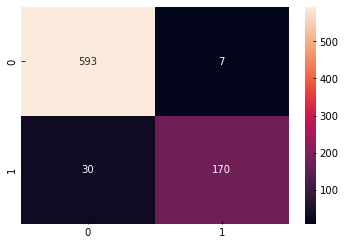

In [67]:
print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix1, annot=True, fmt="d") 
print("      False Positive                  True Positives")

Our confusion matrix shows how this first model struggles significantly with misclassifying "No Ship" images as "Ship" images due to the high number of false positives.

### Our second classifier to train and run hyperparameter tuning on will be SVM.

In [88]:
# n_jobs = -1 to use all cpu's (dangerous on local)
pipe2 = Pipeline([('scaler', StandardScaler()),('svm', SVC(verbose = False, tol = 0.001))])

param_grid2 = {'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]}
grid_search2 = GridSearchCV(pipe2, param_grid2, scoring='accuracy',cv = 3, verbose = 0)
start1 = time()
grid_search2.fit(X_train_reshaped, t_train)
end1 = time()
total1 = end1 - start1
print("\n Total Time:", total1)


 Total Time: 341.7334954738617


In [89]:
print("Best Params: ", grid_search2.best_params_)
print("Best Score: ", grid_search2.best_score_)

pipe2 = grid_search2.best_estimator_
start = time()
y_pred2 = pipe2.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

accuracy2 = accuracy_score(t_test, y_pred2)
print("Accuracy:", accuracy2)

f1_2 = f1_score(t_test, y_pred2, average='macro')
print("F1 Score: ", f1_2)

Best Params:  {'svm__C': 1, 'svm__degree': 3}
Best Score:  0.9606214755825015
Inference time:  8.92661714553833
Accuracy: 0.96125
F1 Score:  0.9467937894621667


Confusion Matrix: 
 [[593   7]
 [ 24 176]]
      True Negative                  False Negative
      False Positive                  True Positives


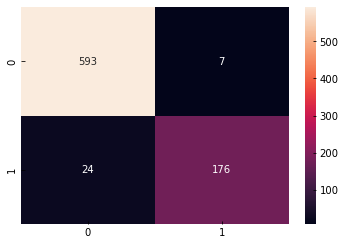

In [25]:
# confusion_matrix2 = confusion_matrix(t_test, y_pred2)
print("Confusion Matrix: \n", confusion_matrix2)

print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix2, annot=True, fmt="d") 
print("      False Positive                  True Positives")

The best parameters found for our SVM was 1 for C and 3 for the degree of the polynomial. Additionally, our accuracy score was a 96.1% and out F1 score was 94.6%. Analyzing the confusion matrix, we reach the same predicament where the model mostly struggles with false positive cases. In this case, it took around 3-5 minutes to train.

## 2. Dimensionality Reduction with PCA

In [87]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))])

pipe3.fit(X_train_reshaped)
X_train_transformed = pipe3.transform(X_train_reshaped)

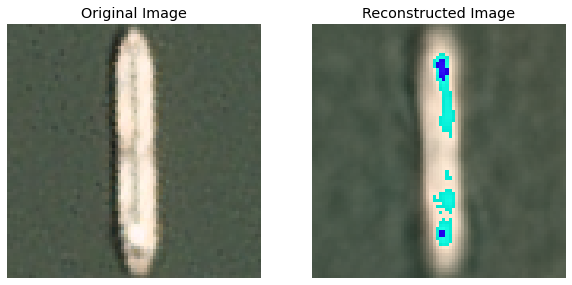

<Figure size 432x288 with 0 Axes>

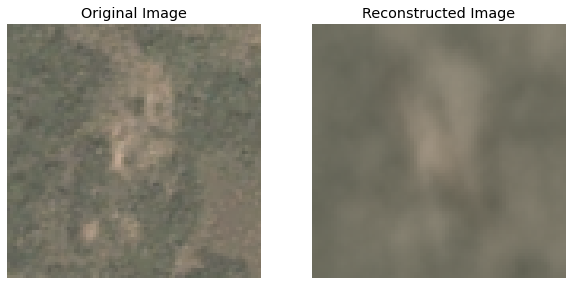

<Figure size 432x288 with 0 Axes>

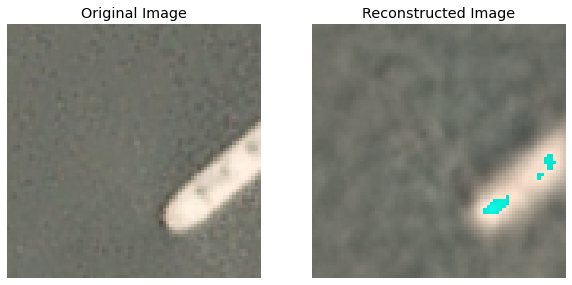

<Figure size 432x288 with 0 Axes>

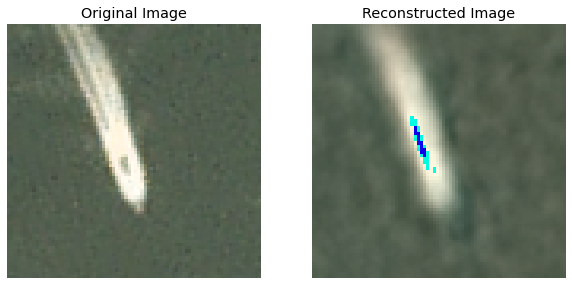

<Figure size 432x288 with 0 Axes>

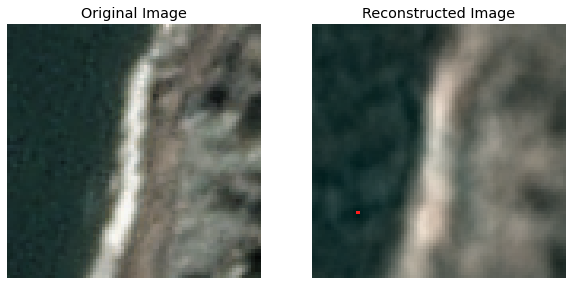

<Figure size 432x288 with 0 Axes>

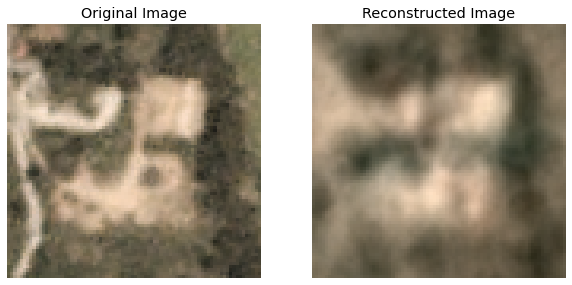

<Figure size 432x288 with 0 Axes>

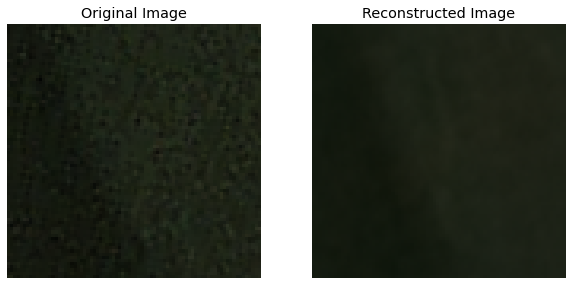

<Figure size 432x288 with 0 Axes>

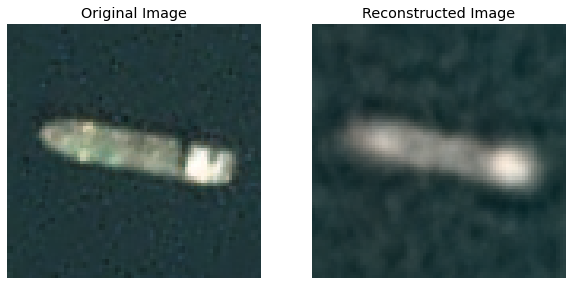

<Figure size 432x288 with 0 Axes>

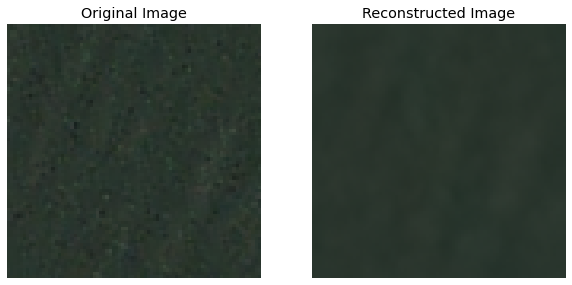

<Figure size 432x288 with 0 Axes>

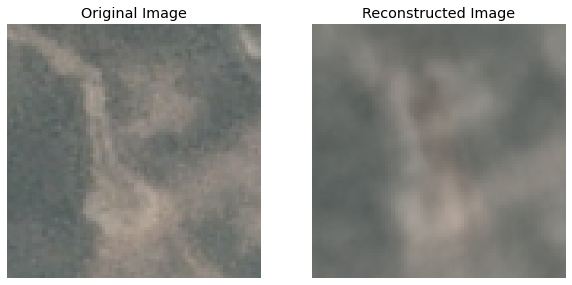

<Figure size 432x288 with 0 Axes>

Explained variance ratio: 0.9003028901489891


In [88]:
  def reconstruct_image(image_data, scaler, pca):
        data_back = pca.inverse_transform(image_data.reshape(1, -1))
        data_back = scaler.inverse_transform(data_back)
        return data_back.reshape(80, 80, 3)
    
    
for i in range(0, 10):
    reconstructed_image = reconstruct_image(X_train_transformed[i], pipe3.steps[0][1], pipe3.steps[1][1])
    reconstructed_image = reconstructed_image.astype(np.uint8)
    # original
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plt.imshow(X_train[i])
    plt.title('Original Image')
    plt.axis('off')

    # reduced
    plt.subplot(122)
    plt.imshow(reconstructed_image, vmin=0, vmax=255)
    plt.title('Reconstructed Image')
    plt.axis('off')
    plt.show()
    plt.tight_layout()
    plt.show()

print("Explained variance ratio:", pipe3.steps[1][1].explained_variance_ratio_.sum())

In [43]:
len(pipe3['pca'].components_)

104

After training, it is found that at least 104 components are necessary for the PCA to retain 90% of the explained variablilty for the data. Our reconstructed images display relatively good depictions despite the massive dimension reduction. 

Average RMSE per number of components (using 50 components):
1 components: 0.8152055045758051
2 components: 0.7477088982209794
3 components: 0.726780470383773
4 components: 0.7022458968193667
5 components: 0.6660860359684085
6 components: 0.6512499581457721
7 components: 0.6273136260380526
8 components: 0.6094941045879405
9 components: 0.5985530416041852
10 components: 0.5827939254540012
11 components: 0.5752567812708617
12 components: 0.566999513262041
13 components: 0.558167251121651
14 components: 0.5506387762880265
15 components: 0.5419299383247345
16 components: 0.5354719292442828
17 components: 0.5285201518896073
18 components: 0.5234960825724454
19 components: 0.516530170012742
20 components: 0.5105995565082894
21 components: 0.5018968747130722
22 components: 0.4971576666924799
23 components: 0.49187231782451685
24 components: 0.48824294966041215
25 components: 0.4836107615750462
26 components: 0.48037817431218455
27 components: 0.47707272911970633
28 components: 0.4737915472190

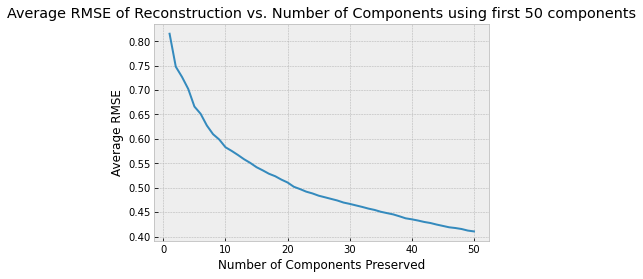

In [85]:
subset_components = 50  

# Calculate and plot RMSE as a function of number of components
avg_rmse_list = []
component_range = range(1, subset_components + 1) 

for num_components in component_range:
    # Create pipeline for num of components
    pca_model = PCA(n_components=num_components)
    X_train_transformed = pca_model.fit_transform(X_train_reshaped)

    # Calculate and average RMSE for first 100 images
    total_rmse = 0
    for i in range(100):
        reconstructed_image = pca_model.inverse_transform(X_train_transformed[i].reshape(1, -1)).reshape(80, 80, 3)
        rmse_per_image = np.sqrt(mean_squared_error(X_train[i].flatten(), reconstructed_image.flatten()))
        total_rmse += rmse_per_image

    avg_rmse = total_rmse / X_train.shape[0]
    avg_rmse_list.append(avg_rmse)

# Print and plot
print("Average RMSE per number of components (using", subset_components, "components):")
for i, num_components in enumerate(component_range):
    print(f"{num_components} components: {avg_rmse_list[i]}")

# Plot average RMSE vs. number of components 
plt.plot(component_range, avg_rmse_list)
plt.xlabel("Number of Components Preserved")
plt.ylabel("Average RMSE")
plt.title("Average RMSE of Reconstruction vs. Number of Components using first 50 components")
plt.show()

Our plot shows that the average RMSE of the PCA approaches 0.40.

## 3. Training Classifier Pipelines with PCA Dimensionality Reduction

In [5]:
pipe4 = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA()),
                 ('forest', RandomForestClassifier())])

param_grid3 = {'pca__n_components': [50, 100],'forest__n_estimators': [50, 100], 'forest__max_depth': [100, 1000]}
grid_search3 = GridSearchCV(pipe4, param_grid3, scoring='accuracy', verbose = 3, cv = 3)

grid_search3.fit(X_train_reshaped, t_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=50;, score=0.959 total time=   2.8s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=50;, score=0.971 total time=   2.8s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=50;, score=0.955 total time=   2.8s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=100;, score=0.950 total time=   3.9s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=100;, score=0.955 total time=   3.9s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, pca__n_components=100;, score=0.946 total time=   3.9s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=100, pca__n_components=50;, score=0.952 total time=   3.3s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=100, pca__n_components=50;, score=0.974 total time=   3.3s
[CV 3/3] END fo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'forest__max_depth': [100, 1000],
                         'forest__n_estimators': [50, 100],
                         'pca__n_components': [50, 100]},
             scoring='accuracy', verbose=3)

In [9]:
print(grid_search3.best_params_, grid_search3.best_score_ )

{'forest__max_depth': 100, 'forest__n_estimators': 50, 'pca__n_components': 50} 0.9615604410676073


In [12]:
pipe4 = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = 50)),
                 ('forest', RandomForestClassifier(n_estimators = 50, max_depth = 100))])
start2 = time()
pipe4.fit(X_train_reshaped, t_train)
end2 = time()
total2 = end2-start2
print("Training Time (seconds): ", total2)

Training Time (seconds):  3.9889540672302246


In [13]:
start = time()
y_pred3 = pipe4.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

accuracy3 = accuracy_score(t_test, y_pred3)
print("Accuracy:", accuracy3)

f13 = f1_score(t_test, y_pred3, average='macro')
print("F1 Score: ", f13)

Inference time:  0.10224366188049316
Accuracy: 0.95125
F1 Score:  0.9315727949223505


Confusion Matrix: 
 [[596   4]
 [ 32 168]]
      True Negative                  False Negative
      False Positive                  True Positives


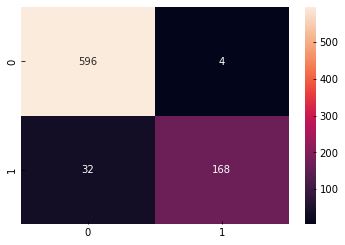

In [15]:
confusion_matrix3 = confusion_matrix(t_test, y_pred3)
print("Confusion Matrix: \n", confusion_matrix3)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix3, annot=True, fmt="d") 
print("      False Positive                  True Positives")

Our first classifier model with PCA managed an accuracy of 94.6% accuracy and an F1 Score of 92.3% which parametes of max depth = 100, number of estimators = 50, and number of components = 50.

**Now we will train our second classifier (SVM) with the PCA**

In [9]:
pipe5 = Pipeline([('scaler', StandardScaler()), 
                  ('pca', PCA()), 
                  ('svm', SVC(verbose = False, tol = 0.001))])

param_grid4 = {'pca__n_components': [50, 100], 'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]}
grid_search4 = GridSearchCV(pipe5, param_grid4, scoring='accuracy',cv = 3, verbose = 0)
grid_search4.fit(X_train_reshaped, t_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [50, 100],
                         'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]},
             scoring='accuracy')

In [18]:
print(grid_search4.best_params_, grid_search4.best_score_)

{'pca__n_components': 100, 'svm__C': 1, 'svm__degree': 3} 0.9584337797815293


In [10]:
pipe5 = Pipeline([('scaler', StandardScaler()), 
                  ('pca', PCA(n_components = 100)), 
                  ('svm', SVC(verbose = False, tol = 0.001, C = 1, degree = 3))])
start3 = time()
pipe5.fit(X_train_reshaped, t_train)
end3 = time()
total3 = end3 - start3
print("\n Total Time:", total3)


 Total Time: 4.598630905151367


Inference time:  0.1718597412109375
Confusion Matrix: 
 [[591   9]
 [ 24 176]]
      True Negative                  False Negative
      False Positive                  True Positives


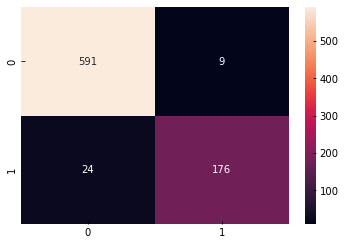

In [14]:
start = time()
y_pred4 = pipe5.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

confusion_matrix4 = confusion_matrix(t_test, y_pred4)
print("Confusion Matrix: \n", confusion_matrix4)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix4, annot=True, fmt="d") 
print("      False Positive                  True Positives")

In [7]:
accuracy4 = accuracy_score(t_test, y_pred4)
print("Accuracy:", accuracy4)

f14 = f1_score(t_test, y_pred4, average='macro')
print("F1 Score: ", f14)

Accuracy: 0.95875
F1 Score:  0.9435626102292769


**Our second model with PCA acheived an accuracy of 95.8% and an F1 score of 94.3%. It also continues the trend of struggling most with false negative cases after training took 4.6 seconds to complete.**

## 4. Classifiers with Manifold Learning Algorithms

Our first models with manifold learning will utilize the Isomap method with our original classifiers.

In [48]:
pipe6 = Pipeline([('scaler', StandardScaler()),
                 ('isomap', Isomap()),
                 ('forest', RandomForestClassifier())])

param_grid6 = {'isomap__n_components': [50, 100],'forest__n_estimators': [50, 100], 'forest__max_depth': [100, 500]}
grid_search6 = GridSearchCV(pipe6, param_grid6, scoring='accuracy', verbose = 3, cv = 3)

grid_search6.fit(X_train_reshaped, t_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=50;, score=0.919 total time=   7.4s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=50;, score=0.932 total time=   7.8s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=50;, score=0.903 total time=   7.5s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=100;, score=0.928 total time=   8.0s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=100;, score=0.932 total time=   8.0s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, isomap__n_components=100;, score=0.903 total time=   7.9s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=100, isomap__n_components=50;, score=0.922 total time=   8.2s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=100, isomap__n_components=50;, score=0.935 total time

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('isomap', Isomap()),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'forest__max_depth': [100, 500],
                         'forest__n_estimators': [50, 100],
                         'isomap__n_components': [50, 100]},
             scoring='accuracy', verbose=3)

In [49]:
print(grid_search6.best_params_, grid_search6.best_score_)

{'forest__max_depth': 100, 'forest__n_estimators': 50, 'isomap__n_components': 100} 0.920932014092688


In [51]:
pipe6 = Pipeline([('scaler', StandardScaler()),
                 ('isomap', Isomap(n_components = 100)),
                 ('forest', RandomForestClassifier(max_depth = 100, n_estimators = 50))])

start5 = time()
pipe6.fit(X_train_reshaped, t_train)
end5 = time()
total5 = end5 - start5
print("\n Total Training Time:", total5)


 Total Training Time: 13.744981288909912


Inference time:  1.6640892028808594
Confusion Matrix: 
 [[576  24]
 [ 40 160]]
      True Negative                  False Negative
      False Positive                  True Positives
Accuracy: 0.92
F1 Score:  0.8903508771929824


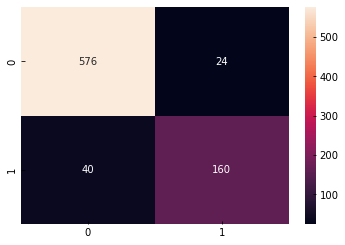

In [82]:
start = time()
y_pred5 = pipe6.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

confusion_matrix5 = confusion_matrix(t_test, y_pred5)
print("Confusion Matrix: \n", confusion_matrix5)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix5, annot=True, fmt="d") 
print("      False Positive                  True Positives")

accuracy5 = accuracy_score(t_test, y_pred5)
print("Accuracy:", accuracy5)

f15 = f1_score(t_test, y_pred5, average='macro')
print("F1 Score: ", f15)

In [53]:
pipe7 = Pipeline([('scaler', StandardScaler()), 
                  ('isomap', Isomap()), 
                  ('svm', SVC(verbose = False, tol = 0.001))])

param_grid7 = {'isomap__n_components': [50, 100], 'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]}
grid_search7 = GridSearchCV(pipe7, param_grid7, scoring='accuracy',cv = 3, verbose = 0)
grid_search7.fit(X_train_reshaped, t_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('isomap', Isomap()), ('svm', SVC())]),
             param_grid={'isomap__n_components': [50, 100],
                         'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]},
             scoring='accuracy')

In [54]:
print(grid_search7.best_params_, grid_search7.best_score_)

{'isomap__n_components': 100, 'svm__C': 1, 'svm__degree': 3} 0.9190593582094714


In [43]:
pipe7 = Pipeline([('scaler', StandardScaler()), 
                  ('isomap', Isomap(n_components = 100)), 
                  ('svm', SVC(C = 1, degree = 3, verbose = False, tol = 0.001))])

start6 = time()
pipe7.fit(X_train_reshaped, t_train)
end6 = time()
total6 = end6 - start6
print("\n Total Training Time:", total6)


 Total Training Time: 12.01157021522522


Inference time:  1.7493870258331299
Confusion Matrix: 
 [[582  18]
 [ 39 161]]
      True Negative                  False Negative
      False Positive                  True Positives
Accuracy: 0.92875
F1 Score:  0.9014605874764187


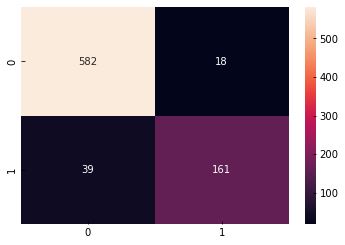

In [81]:
start = time()
y_pred6 = pipe7.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

confusion_matrix6 = confusion_matrix(t_test, y_pred6)
print("Confusion Matrix: \n", confusion_matrix6)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix6, annot=True, fmt="d") 
print("      False Positive                  True Positives")

accuracy5 = accuracy_score(t_test, y_pred6)
print("Accuracy:", accuracy5)

f16 = f1_score(t_test, y_pred6, average='macro')
print("F1 Score: ", f16)

Both classifiers perform worse when using Isomaps. Accuracy and F1 scores are decreased to about 89%-92% and training times also increase.

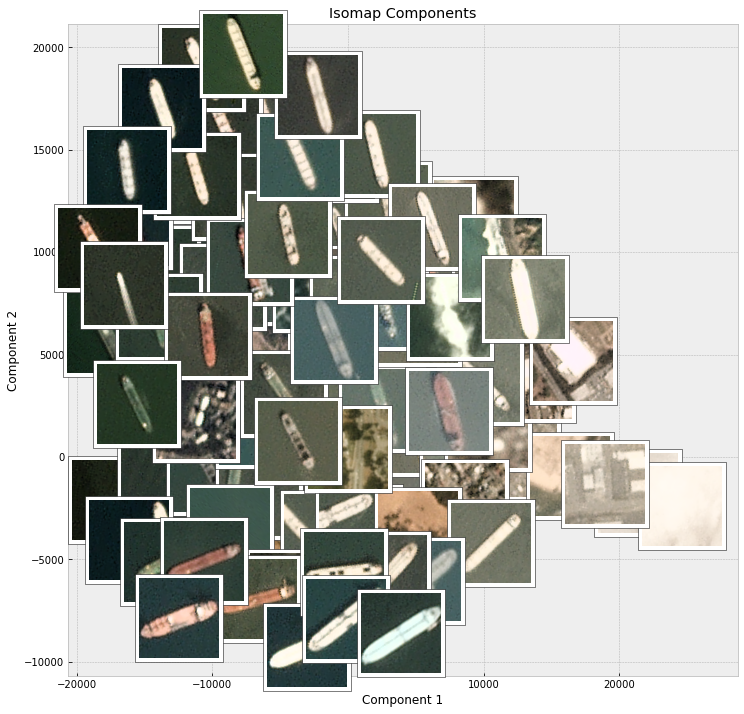

In [5]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
     
    

plt.figure(figsize=(12, 12))
plot_components(X_train_reshaped, Isomap(), images=X_train)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Isomap Components")
plt.show()


The first 2 dimensions appear to be representing the orientation of the ship and the brightness of the image. Along the y-axis (component 2) the vertically oriented boats are apparent as the value increases and horizontally oriented boats are group towards its decreasing values. Additionally, on the x-axis (component 1) as values increase, the images get brighter. The images change from dark blue/black images on the left towards lighter whites and greys on the right.

**Now we will build and train the same classifiers using LLE.**

In [70]:
pipe8 = Pipeline([('scaler', StandardScaler()),
                 ('lle', LocallyLinearEmbedding()),
                 ('forest', RandomForestClassifier())])

param_grid8 = {'lle__n_components': [50, 100],'forest__n_estimators': [50, 100], 'forest__max_depth': [100, 500]}
grid_search8 = GridSearchCV(pipe8, param_grid8, scoring='accuracy', verbose = 3, cv = 3)

grid_search8.fit(X_train_reshaped, t_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=50;, score=0.904 total time=   7.6s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=50;, score=0.922 total time=   7.6s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=50;, score=0.907 total time=   7.6s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=100;, score=0.910 total time=   8.1s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=100;, score=0.927 total time=   8.3s
[CV 3/3] END forest__max_depth=100, forest__n_estimators=50, lle__n_components=100;, score=0.907 total time=   8.3s
[CV 1/3] END forest__max_depth=100, forest__n_estimators=100, lle__n_components=50;, score=0.903 total time=   8.6s
[CV 2/3] END forest__max_depth=100, forest__n_estimators=100, lle__n_components=50;, score=0.918 total time=   8.6s
[CV 3/3] END fo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lle', LocallyLinearEmbedding()),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'forest__max_depth': [100, 500],
                         'forest__n_estimators': [50, 100],
                         'lle__n_components': [50, 100]},
             scoring='accuracy', verbose=3)

In [71]:
print(grid_search8.best_params_, grid_search8.best_score_)

{'forest__max_depth': 100, 'forest__n_estimators': 100, 'lle__n_components': 100} 0.9165598461550184


In [40]:
pipe8 = Pipeline([('scaler', StandardScaler()),
                 ('lle', LocallyLinearEmbedding(n_components = 100)),
                 ('forest', RandomForestClassifier(n_estimators = 100, max_depth = 100))])

start7 = time()
pipe8.fit(X_train_reshaped, t_train)
end7 = time()
total7 = end7 - start7
print("\n Total Training Time:", total7)


 Total Training Time: 15.026349782943726


Inference time:  2.0460498332977295
Confusion Matrix: 
 [[582  18]
 [ 46 154]]
      True Negative                  False Negative
      False Positive                  True Positives
Accuracy: 0.92
F1 Score:  0.8879198627018318


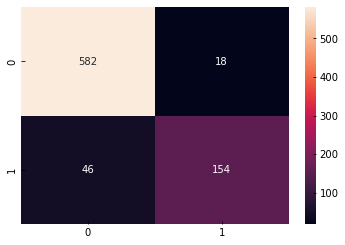

In [41]:
start = time()
y_pred7 = pipe8.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

confusion_matrix7 = confusion_matrix(t_test, y_pred7)
print("Confusion Matrix: \n", confusion_matrix7)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix7, annot=True, fmt="d") 
print("      False Positive                  True Positives")

accuracy7 = accuracy_score(t_test, y_pred7)
print("Accuracy:", accuracy7)

f17 = f1_score(t_test, y_pred7, average='macro')
print("F1 Score: ", f17)

In [74]:
pipe9 = Pipeline([('scaler', StandardScaler()), 
                  ('lle', LocallyLinearEmbedding()), 
                  ('svm', SVC(verbose = False, tol = 0.001))])

param_grid9 = {'lle__n_components': [50, 100], 'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]}
grid_search9 = GridSearchCV(pipe9, param_grid9, scoring='accuracy',cv = 3, verbose = 0)
grid_search9.fit(X_train_reshaped, t_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lle', LocallyLinearEmbedding()),
                                       ('svm', SVC())]),
             param_grid={'lle__n_components': [50, 100],
                         'svm__C': [0.3, 0.5, 1], 'svm__degree': [3, 4]},
             scoring='accuracy')

In [76]:
print(grid_search9.best_params_, grid_search9.best_score_)

{'lle__n_components': 100, 'svm__C': 1, 'svm__degree': 3} 0.918747835016379


In [77]:
pipe9 = Pipeline([('scaler', StandardScaler()), 
                  ('lle', LocallyLinearEmbedding(n_components = 100)), 
                  ('svm', SVC(C = 1, degree = 3, verbose = False, tol = 0.001))])

start9 = time()
pipe9.fit(X_train_reshaped, t_train)
end9 = time()
total9 = end9 - start9
print("\n Total Training Time:", total9)


 Total Training Time: 9.9778151512146


Inference time:  2.141172409057617
Confusion Matrix: 
 [[585  15]
 [ 45 155]]
      True Negative                  False Negative
      False Positive                  True Positives
Accuracy: 0.925
F1 Score:  0.89452867501648


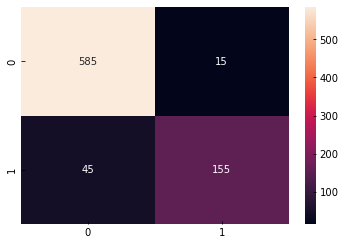

In [79]:
start = time()
y_pred8 = pipe9.predict(X_test_reshaped)
end = time()
total = end - start
print("Inference time: ", total)

confusion_matrix8 = confusion_matrix(t_test, y_pred8)
print("Confusion Matrix: \n", confusion_matrix8)


print("      True Negative                  False Negative")
sns.heatmap(confusion_matrix8, annot=True, fmt="d") 
print("      False Positive                  True Positives")

accuracy8 = accuracy_score(t_test, y_pred8)
print("Accuracy:", accuracy8)

f18 = f1_score(t_test, y_pred8, average='macro')
print("F1 Score: ", f18)

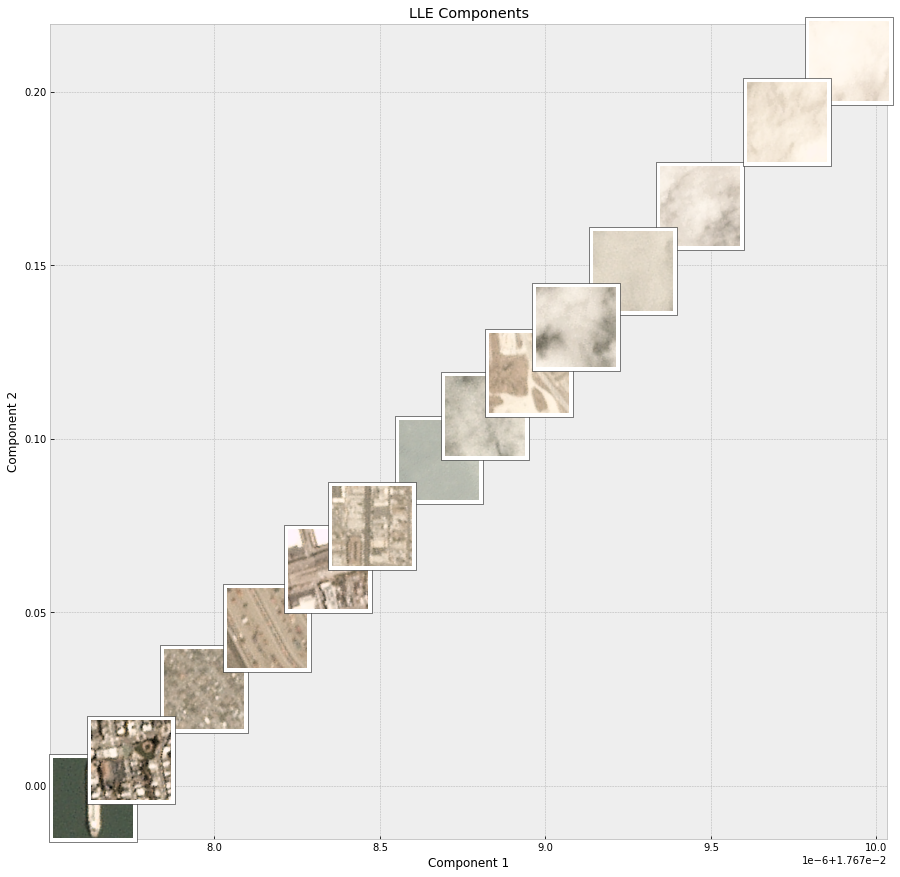

In [7]:
plt.figure(figsize=(15, 15))
plot_components(X_train_reshaped, LocallyLinearEmbedding(), images=X_train)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("LLE Components")
plt.show()


When plotting the first two components from LLE, we obtain a linear plot that appears to trend towards increasingly blank/solid color images as the values of the first two components increase. Easily identifiable ships are present towards the origin of the plot.

**Out of all of these models, our random forrest classifier with PCA dimensionality reduction (pipe5) has provided the best performace for its training and inference time with and accuracy of 95.8%, and training time of 4.6 seconds.**

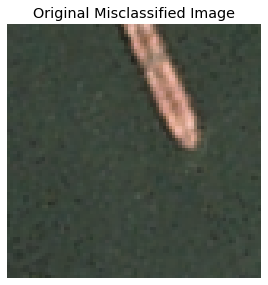

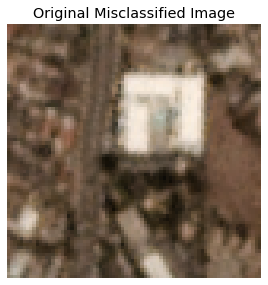

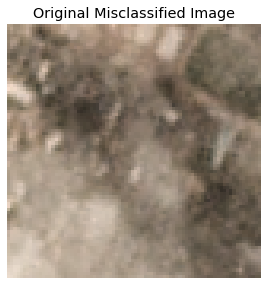

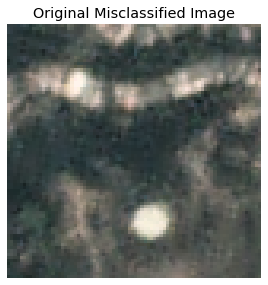

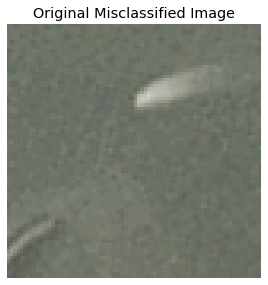

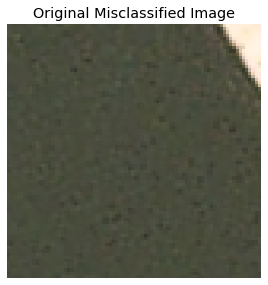

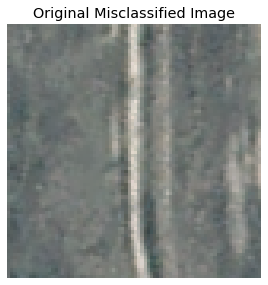

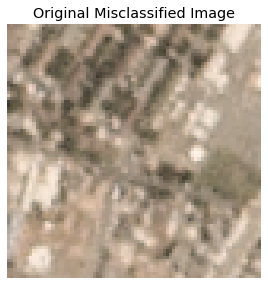

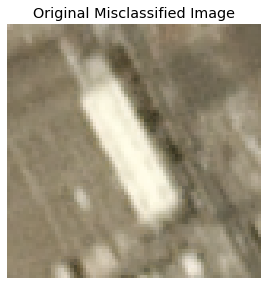

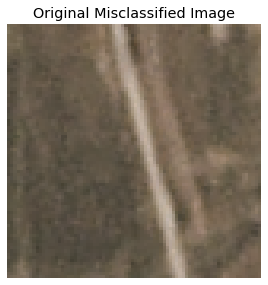

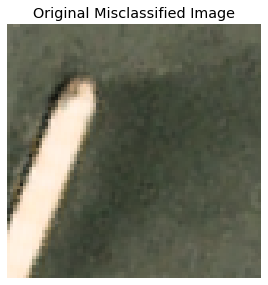

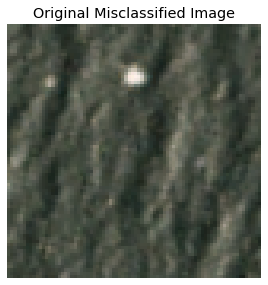

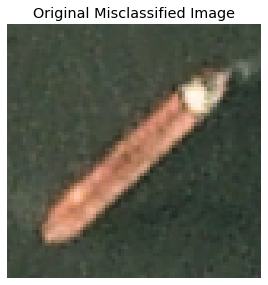

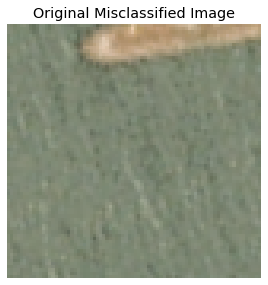

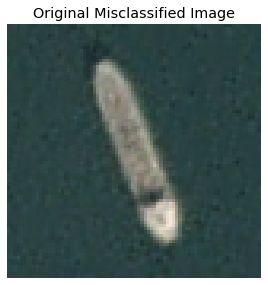

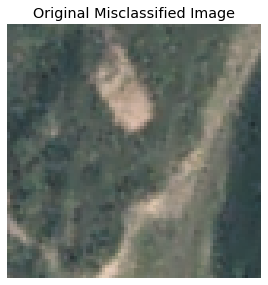

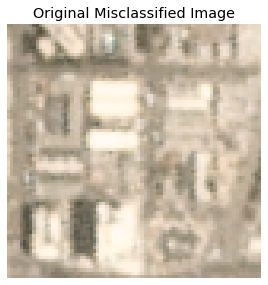

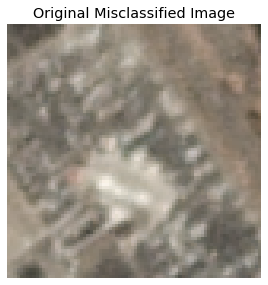

In [37]:

for i in range(50, 400):
    if y_pred4[i] != t_test[i]:
        plt.figure(figsize=(10, 6))
        plt.subplot(121)
        plt.imshow(X_train[i])
        plt.title('Original Misclassified Image')
        plt.axis('off')

After viewing which images were misclassified, it can clearly be seen that the model mostly misclassifies images as ships when the images should be classified as "no ship" due to the variety of some ship-resembling objects in the image. This correlates with the trend of more false positives that false negatives. Moving forward, to deal with this, we could potentially apply a higher weight to the "no ship" class along with further hyperparameter tuning.

In [44]:
with open('Q1_RandForest.pkl', 'wb') as file:
    pickle.dump(pipe1, file)

with open('Q3_pca_svm.pkl', 'wb') as file:
    pickle.dump(pipe5, file)

with open('Q4_isomap_svm.pkl', 'wb') as file:
    pickle.dump(pipe7, file)

